# Predicting Diabetes Onset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./diabetes.csv')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [6]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [7]:
data = df.values[:, 0:8]
target = df['Outcome'].values[:]
data

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
np.unique(target, return_counts=True)

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.50)
N, D = X_train.shape
X_train.shape

(384, 8)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/200
12/12 [==============================] - 1s 16ms/step - loss: 0.7897 - accuracy: 0.5729 - val_loss: 0.7482 - val_accuracy: 0.5781
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.7785 - accuracy: 0.5755 - val_loss: 0.7375 - val_accuracy: 0.5990
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 0.7675 - accuracy: 0.5755 - val_loss: 0.7274 - val_accuracy: 0.6068
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.7578 - accuracy: 0.5911 - val_loss: 0.7170 - val_accuracy: 0.6146
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.7476 - accuracy: 0.5964 - val_loss: 0.7073 - val_accuracy: 0.6224
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.7378 - accuracy: 0.5964 - val_loss: 0.6983 - val_accuracy: 0.6276
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 0.7287 - accuracy: 0.6042 - val_loss: 0.6894 - val_accuracy: 0.6302
Epoch 8/200


In [12]:
model.evaluate(X_train, y_train)

 1/12 [=>............................] - ETA: 0s - loss: 0.5208 - accuracy: 0.7500

12/12 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7760


[0.4553121030330658, 0.7760416865348816]

In [13]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7812


[0.4846820831298828, 0.78125]

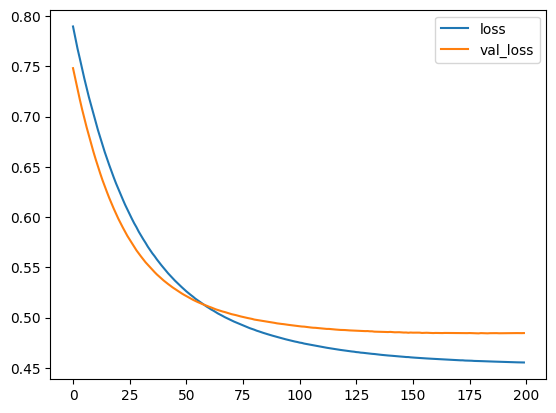

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

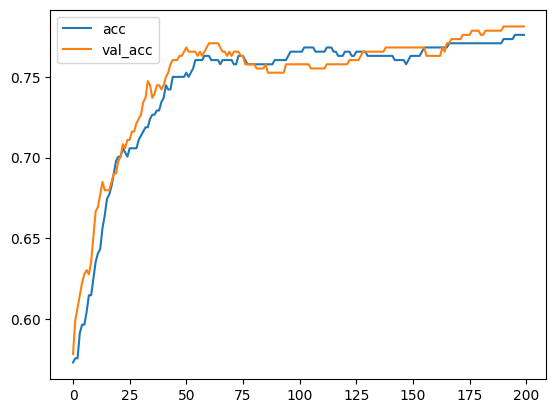

In [15]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label="val_acc")
plt.legend()

In [16]:
P = model.predict(X_test)
P

12/12 [==============================] - 0s 1ms/step


array([[0.8222612 ],
       [0.4162079 ],
       [0.7401272 ],
       [0.07635724],
       [0.03020159],
       [0.6480076 ],
       [0.12707022],
       [0.08802704],
       [0.07524148],
       [0.2276341 ],
       [0.26899105],
       [0.07799968],
       [0.07106144],
       [0.3777951 ],
       [0.01870527],
       [0.8375978 ],
       [0.16144785],
       [0.31068116],
       [0.02894084],
       [0.7093584 ],
       [0.2433884 ],
       [0.5853371 ],
       [0.28030148],
       [0.6807096 ],
       [0.11353909],
       [0.3418334 ],
       [0.7602599 ],
       [0.09884481],
       [0.23513034],
       [0.8836612 ],
       [0.2038467 ],
       [0.9009901 ],
       [0.0406228 ],
       [0.6853485 ],
       [0.1788559 ],
       [0.7529861 ],
       [0.10624644],
       [0.5599186 ],
       [0.7552835 ],
       [0.03354805],
       [0.07209619],
       [0.33538404],
       [0.9962528 ],
       [0.35153526],
       [0.26585978],
       [0.935412  ],
       [0.08776508],
       [0.181

In [17]:
P = np.round(P).flatten()
P

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [18]:
print(f"Manually calculated accuracy: {np.mean(P == y_test)}")
print(f"Evaluate output: {model.evaluate(X_test, y_test)}")

Manually calculated accuracy: 0.78125
12/12 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7812
Evaluate output: [0.4846820831298828, 0.78125]


In [19]:
model.save('linearclassifier.h5')

In [20]:
model = tf.keras.models.load_model('linearclassifier.h5')

In [21]:
print(model.layers)

In [22]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7812


[0.4846820831298828, 0.78125]